In [2]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt

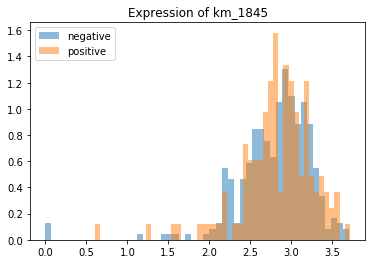

In [9]:
# Loading kmer table
with open('data/km_table_1.py', 'rb') as f:
    kmer_table = pickle.load(f)
# Loading patient table
patient_table = pd.read_csv('data/leucegene.csv', index_col=0, skipfooter=1, engine='python')
patients = patient_table.index.values
# Extracting flt3 label
flt3 = [(-1 if i == '-' else int(i)) for i in patient_table['FLT3-ITD mutation']]
# Filtering out patients with no data
kmer_table_filtered = kmer_table.copy()
for row in flt3:
    if row == -1:
        kmer_table_filtered = kmer_table_filtered.drop(kmer_table_filtered.index[row])
patient_list_filtered = []
flt3_filtered = []
for i in range(len(flt3)):
    if flt3[i] != -1:
        patient_list_filtered.append(patients[i])
        flt3_filtered.append(flt3[i])

# Normalisation
def norm_0(tb):
    '''
    Divide by the sum across a patient
    '''
    return tb / np.array(np.sum(tb, axis=1)).reshape(-1, 1)

def norm_1(tb):
    '''
    z (standard normal distribution)
    '''
    return (km_flog10 - np.array(np.mean(km_flog10, axis=1)).reshape(-1,1))
km_normed_0 = norm_0(km_flog10)
km_normed_1 = norm_1(km_flog10)
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, random_state=0)

In [4]:
def plot_comparison(km_id):
    ratio = 320 / 132
    plt.hist([km_normed_1.iloc[:,km_id][i] for i in range(len(km_normed_1.iloc[:,km_id])) if flt3_filtered[i] == 0], bins=50, alpha = 0.5, label='negative', density=True)
    plt.hist([km_normed_1.iloc[:,km_id][i] for i in range(len(km_normed_1.iloc[:,km_id])) if flt3_filtered[i] == 1], bins=50, alpha = 0.5, label='positive', density=True)
    plt.legend(loc='upper left')
    plt.title(f"Expression of km_{km_id}")
    plt.show()

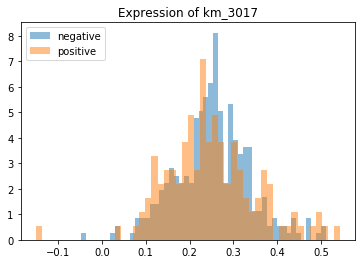

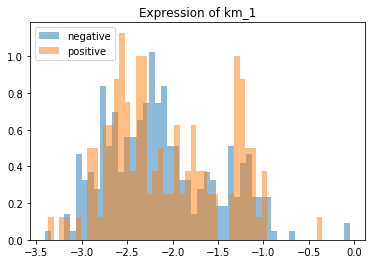

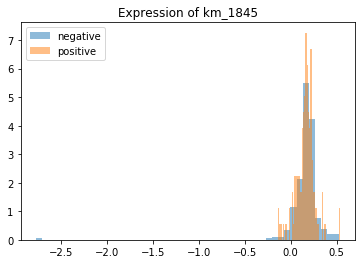

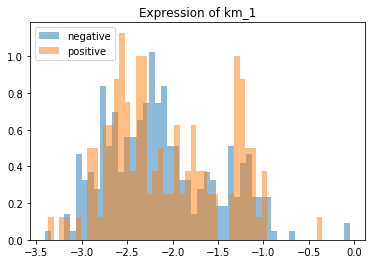

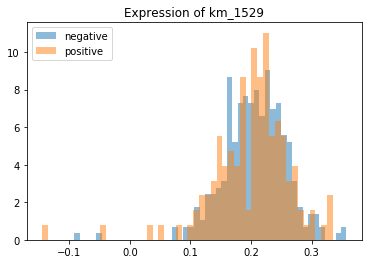

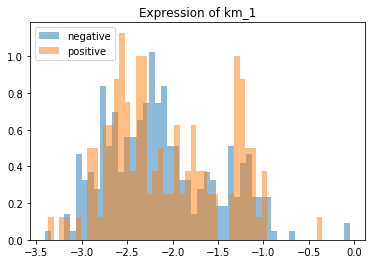

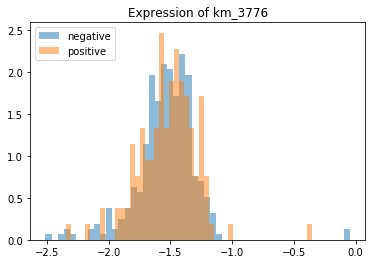

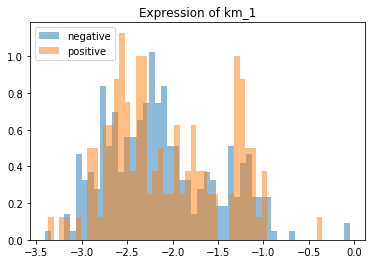

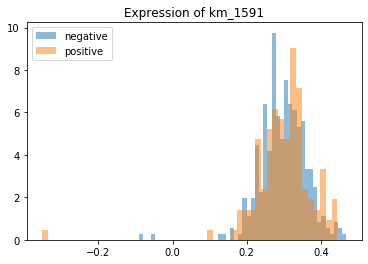

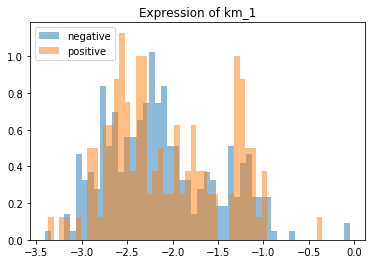

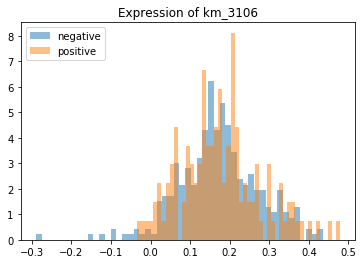

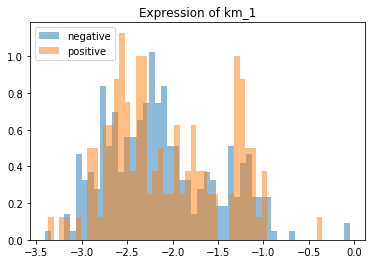

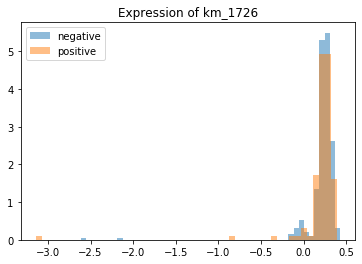

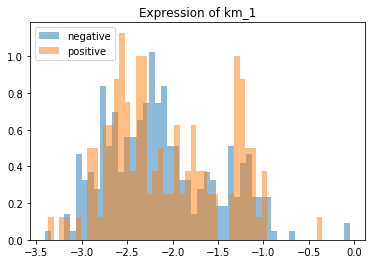

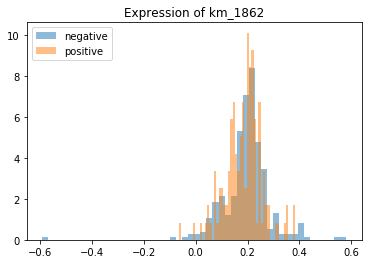

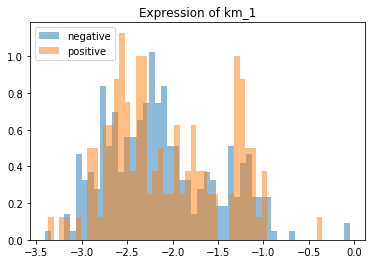

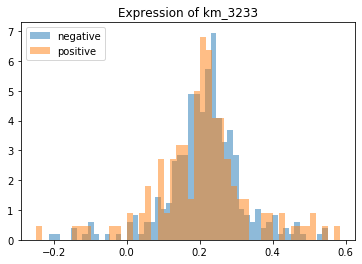

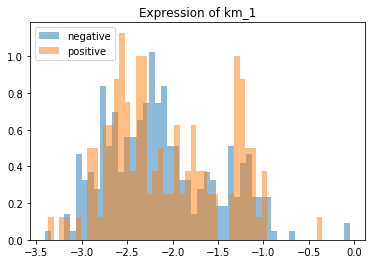

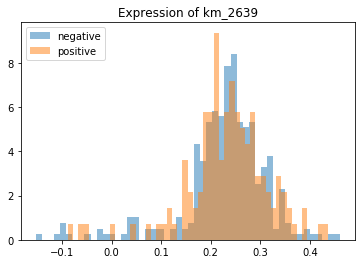

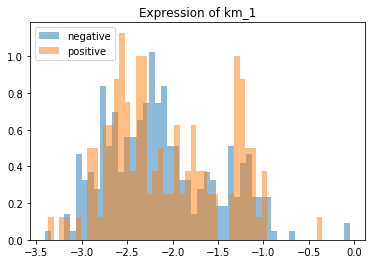

In [8]:
for i in range(10):
    n = rand.randrange(0, km_normed_1.shape[1])
    plot_comparison(n)
    plot_comparison(1)

3796